In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import os

In [2]:
df=pd.read_csv(r"F:\ELECTRONICS VM ONE 2021\Ankit\Micro-Credit-Project\Micro Credit Project\Data file.csv")

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
df["maxamnt_loans30"].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [5]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
df.isnull().values.any()

False

# Variable	Definition	Comment
#label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}	
msisdn	mobile number of user	
aon	age on cellular network in days	
daily_decr30	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	
daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)	
rental30	Average main account balance over last 30 days	Unsure of given definition
rental90	Average main account balance over last 90 days	Unsure of given definition
last_rech_date_ma	Number of days till last recharge of main account	
last_rech_date_da	Number of days till last recharge of data account	
last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)	
cnt_ma_rech30	Number of times main account got recharged in last 30 days	
fr_ma_rech30	Frequency of main account recharged in last 30 days	Unsure of given definition
sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	
medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)	
medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	
cnt_ma_rech90	Number of times main account got recharged in last 90 days	
fr_ma_rech90	Frequency of main account recharged in last 90 days	Unsure of given definition
sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	
medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)	
medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)	
cnt_da_rech30	Number of times data account got recharged in last 30 days	
fr_da_rech30	Frequency of data account recharged in last 30 days	
cnt_da_rech90	Number of times data account got recharged in last 90 days	
fr_da_rech90	Frequency of data account recharged in last 90 days	
cnt_loans30	Number of loans taken by user in last 30 days	
amnt_loans30	Total amount of loans taken by user in last 30 days	
maxamnt_loans30	maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days	
cnt_loans90	Number of loans taken by user in last 90 days	
amnt_loans90	Total amount of loans taken by user in last 90 days	
maxamnt_loans90	maximum amount of loan taken by the user in last 90 days	
medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days	
payback30	Average payback time in days over last 30 days	
payback90	Average payback time in days over last 90 days	
pcircle	telecom circle	
pdate	date	


6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


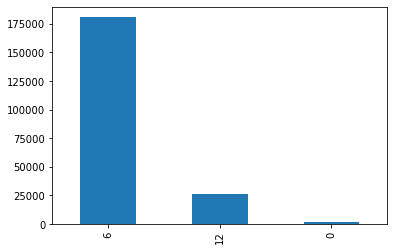

In [7]:
df["maxamnt_loans90"].value_counts().plot(kind = "bar")
print(df["maxamnt_loans90"].value_counts())
#people who have taken loan in 90 days as we can se that the maxium number of people have taken loan 6 times and after that is 12 times and the rest number of people have taken no loan . . 

<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

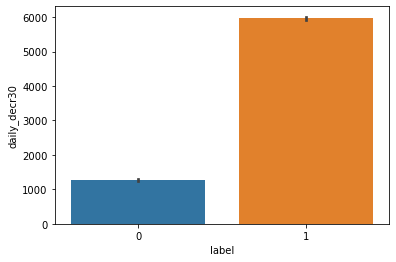

In [8]:
sns.barplot(x="label",y="daily_decr30",data=df)
# DAILY Amount spend is heighest for thge people who pay back the loan frequntly and the person who spends less amount daily is not paying back the loan 
# as per this also we can also get some rough idea  who we can give the loan 

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

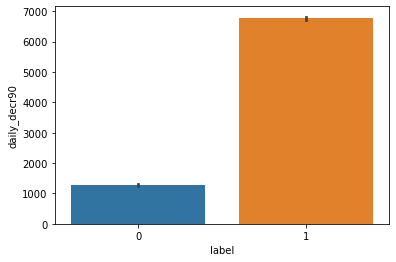

In [9]:
sns.barplot(x="label",y="daily_decr90",data=df)
#MENTION AS ABOVE 

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='label'>

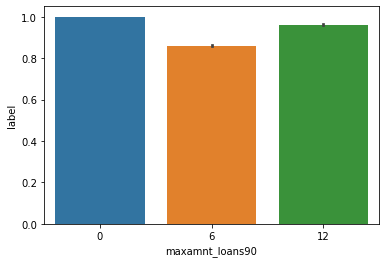

In [10]:
sns.barplot(x="maxamnt_loans90",y="label",data=df)
#We should focus on the person that how many times the person has taken loan as per this graph we can come to know that the how many people not taken the loan and how many have taken the loan 
# how people who have taken 

In [11]:
failure_df=df.loc[df["label"]== 0]

In [12]:
succes_df=df.loc[df["label"]== 1]

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='label'>

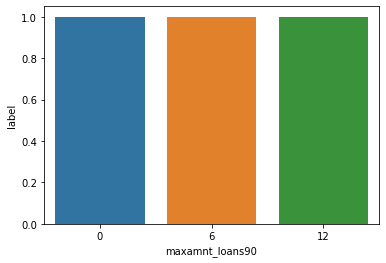

In [13]:
sns.barplot(x="maxamnt_loans90",y="label",data=succes_df)

<AxesSubplot:xlabel='label', ylabel='rental90'>

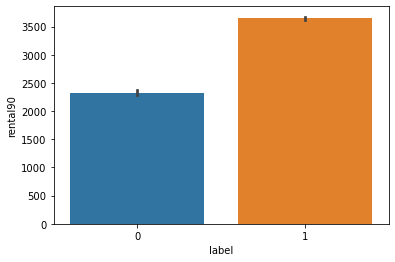

In [14]:
sns.barplot(x="label",y="rental90",data=df)
#as per this graph we can see that the number of people who are doing regular number of recharge payes the loan amount and the poeple who do less recharge have failure in the loan payment.
# this recharge are of the people who have recharge their the phone under 90 days cycle.

<AxesSubplot:xlabel='label', ylabel='rental30'>

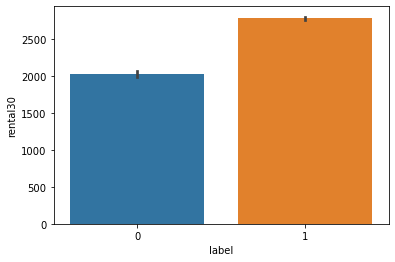

In [15]:
sns.barplot(x="label",y="rental30",data=df)

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech30'>

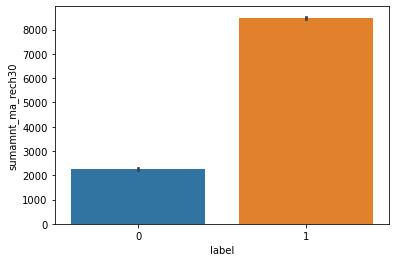

In [16]:
sns.barplot(x="label",y="sumamnt_ma_rech30",data=df)
#as we can se the the people who failed to pay the  loan amount have recharges less amount and the people who have paid the loan amount had done large amount of recharge.

In [17]:
corr_matrix=df.corr()
corr_matrix["label"].sort_values(ascending=False)
# as per we can decide which varible is important for the further proccessing of the dataframe and the business development.

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

In [18]:
df_new=df.drop(columns=["fr_ma_rech90","maxamnt_loans90","rental90","payback90","medianamnt_loans30","medianmarechprebal90","cnt_loans90","cnt_da_rech30","last_rech_date_ma","cnt_da_rech90","last_rech_date_da","fr_ma_rech30","Unnamed: 0","maxamnt_loans30","fr_da_rech30","aon","medianmarechprebal30","fr_da_rech90"],axis=1)

In [19]:
df_new

,label,msisdn,daily_decr30,daily_decr90,rental30,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,amnt_loans90,medianamnt_loans90,payback30,pcircle,pdate
0,0,21408I70789,3055.050000,3065.150000,220.13,1539,2,3078.0,1539.0,2,3078,1539.0,2,12,12,0.0,29.000000,UPW,2016-07-20
1,1,76462I70374,12122.000000,12124.750000,3691.26,5787,1,5787.0,5787.0,1,5787,5787.0,1,12,12,0.0,0.000000,UPW,2016-08-10
2,1,17943I70372,1398.000000,1398.000000,900.13,1539,1,1539.0,1539.0,1,1539,1539.0,1,6,6,0.0,0.000000,UPW,2016-08-19
3,1,55773I70781,21.228000,21.228000,159.42,947,0,0.0,0.0,1,947,947.0,2,12,12,0.0,0.000000,UPW,2016-06-06
4,1,03813I82730,150.619333,150.619333,1098.90,2309,7,20029.0,2309.0,8,23496,2888.0,7,42,42,0.0,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,151.872333,151.872333,1089.19,4048,3,10404.0,3178.0,3,10404,3178.0,2,12,12,0.0,1.000000,UPW,2016-06-17
209589,1,95583I84455,36.936000,36.936000,1728.36,773,4,3092.0,773.0,6,4038,773.0,3,18,18,0.0,1.000000,UPW,2016-06-12
209590,1,28556I85350,11843.111667,11904.350000,5861.83,1539,5,9334.0,1539.0,11,18592,1539.0,4,42,54,0.0,4.000000,UPW,2016-07-29
209591,1,59712I82733,12488.228333,12574.370000,411.83,773,5,12154.0,773.0,6,17941,2410.5,2,18,24,0.0,0.000000,UPW,2016-07-25


In [20]:
df_new.skew()

label                  -2.270254
daily_decr30            3.946230
daily_decr90            4.252565
rental30                4.521929
last_rech_amt_ma        3.781149
cnt_ma_rech30           3.283842
sumamnt_ma_rech30       6.386787
medianamnt_ma_rech30    3.512324
cnt_ma_rech90           3.425254
sumamnt_ma_rech90       4.897950
medianamnt_ma_rech90    3.752706
cnt_loans30             2.713421
amnt_loans30            2.975719
amnt_loans90            3.150006
medianamnt_loans90      4.895720
payback30               8.310695
dtype: float64

In [ ]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_new))
threshold=3
df_new =df_new[(z < 3).all(axis=1)]